# **Preprocessing**

### **Mengimport Library yang dibutuhkan**

In [429]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### **Memuat data**

In [430]:
# load dataset
df = pd.read_csv('train.csv')
# menampilkan dimensi dari dataset
df.shape


(2000, 21)

Dapat dilihat bahwa dataset ini memiliki 2001 entri data dan 21 kolom atribut. Pada deskripsi dataset mobile price, dataset ini memiliki 20 attribut dan 1 class target.

In [431]:
# menampilkan preview data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### **Melihat Value dari Target Class**
pada dataset ini, 'price_range' merupakan target class. sekarang saya akan melihat apa saja isi dari target class tersebut

In [432]:
# melihat unique value target class
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

'price_range' memiliki 4 value yaitu berupa angka 0 sampai dengan 3. Dari deskripsi pada dataset ini, berikut maksud dari 4 value class target tersebut:

- Class 0: Harga paling rendah
- Class 1: Harga sedang
- Class 2: Harga sedikit lebih mahal
- Class 3: Harga paling mahal

### **Memilih fitur**

In [433]:
# menampilkan kolom-kolom yang ada
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Disini saya akan menggunakan semua fitur yang ada

### **Menangani nilai yang hilang**

In [434]:
# mencek dataset apakah ada data yang hilang
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Terlihat disini bahwa dataset yang digunakan tidak memiliki missing value. Jadi tidak perlu untuk ditindak lanjuti.

### **Menghapus data yang tidak relevan**
Semua data yang ada berpengaruh dalam proses prediksi alias semua data sudah relevan dan tidak perlu menghapus apapun 

### **Mengubah data kategorikal menjadi numerik**

In [435]:
# cek tipe data dari data frame yang kita punya 
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

Semua data sudah merupakan tipe data numerik yang terdiri dari tipe data Integer dan Float. Jadi tidak memerlukan konversi tipe data

### **Membuat variabel atribut/fitur dan variabel target class¶**
Setelah eksplorasi data selesai, saatnya untuk memulai membuat model. Langkah pertama, saya membuat variabel khusus untuk dataframe yang berisi atribut/fitur dan target class

In [436]:
# membuang kolom 'price_range' dari dataframe
X = df.drop(['price_range'], axis=1) 
# hanya mengambil kolom 'price_range' dari dataframe
y = df['price_range']

### **Memisahkan data menjadi set pelatihan dan pengujian**

In [437]:
# Membuat data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Saya memisahkan data traning dan data testing dengan rasio 75:25

In [438]:
# cek bentuk dari X_train and X_test
X_train.shape, X_test.shape

((1500, 20), (500, 20))

## **Training Menggunakan KNN**

In [439]:
# Menentukan nilai k
k = 5
# Membuat kNN model
model = KNeighborsClassifier(n_neighbors=k)
# Melatih model dengan data training
model.fit(X_train, y_train)

KNeighborsClassifier()

In [440]:
# Melakukan prediksi class menggunakan atribut di data testing
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 3, 3, 3, 0, 1, 0, 0, 1, 3, 0, 2, 1,
       0, 3, 2, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 3,
       2, 2, 3, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 1, 1, 2, 3, 3, 1, 0, 1, 1, 3,
       3, 1, 1, 0, 2, 2, 0, 3, 2, 3, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0,
       3, 1, 1, 0, 3, 2, 2, 3, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0,
       3, 0, 3, 1, 1, 1, 0, 2, 3, 0, 2, 0, 0, 3, 1, 1, 1, 2, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 3, 2, 0, 0, 0, 2, 1, 2, 3, 0, 1, 3, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3,
       1, 2, 3, 1, 2, 2, 1, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 2, 3, 2, 1, 2,
       3, 3, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 3, 2, 0, 3, 2, 3, 0, 1, 1, 3, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3,
       2, 2, 3, 0, 3, 3, 0, 0, 1, 0, 0, 2, 2, 2, 2, 3, 3, 0, 1, 2, 1, 3,
       0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2,

In [441]:
# mengecek akurasi prediksi
acc_knn = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_knn, 2)) + ' %.')

Akurasi Model : 91.4 %.


In [442]:
# report keseluruhan
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       119
           1       0.90      0.92      0.91       132
           2       0.92      0.84      0.88       133
           3       0.88      0.97      0.92       116

    accuracy                           0.91       500
   macro avg       0.92      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500



In [443]:
# save Model
joblib.dump(model, 'model_knn.pkl')

['model_knn.pkl']

## **Training Menggunakan Naive Bayes**

In [444]:
# Membuat naive bayes model
model = GaussianNB()
# Melatih model dengan data training
model.fit(X_train, y_train)

GaussianNB()

In [445]:
# Melakukan prediksi class menggunakan atribut di data testing
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 3, 3, 3, 1, 1, 0, 0, 1, 3, 1, 1, 1,
       0, 3, 2, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2, 2, 2, 1, 2, 3,
       2, 2, 3, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 3, 0, 2, 2, 3, 1, 1, 2, 3, 3, 1, 0, 1, 1, 3,
       3, 1, 1, 1, 2, 2, 0, 3, 2, 3, 1, 0, 1, 1, 0, 1, 1, 3, 1, 1, 2, 0,
       3, 0, 1, 0, 3, 2, 2, 3, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       3, 1, 3, 1, 2, 1, 1, 1, 3, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 3, 1, 0, 0, 0, 2, 1, 3, 3, 0, 1, 3, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3,
       0, 2, 3, 1, 2, 3, 1, 3, 3, 1, 2, 0, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3,
       3, 3, 3, 0, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 3, 2, 0, 3, 2, 3, 0, 1, 1, 3, 3, 3, 0, 2, 0, 3, 1, 2, 0, 2,
       2, 2, 3, 0, 3, 3, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 1, 3,
       0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 3, 2,

In [446]:
# mengecek akurasi prediksi
acc_nb = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_nb, 2)) + ' %.')

Akurasi Model : 79.6 %.


In [447]:
# report keseluruhan
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       111
           1       0.69      0.69      0.69       135
           2       0.77      0.71      0.74       133
           3       0.90      0.94      0.92       121

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.79      0.80      0.79       500



In [448]:
# save Model
joblib.dump(model, 'model_nb.pkl')

['model_nb.pkl']

## **Training Menggunakan Decision Tree**

In [449]:
# Membuat Decision Tree model
model = DecisionTreeClassifier()
# Melatih model dengan data training
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [450]:
# Melakukan prediksi class menggunakan atribut di data testing
y_pred = model.predict(X_test)
y_pred

array([1, 1, 3, 1, 0, 1, 0, 1, 1, 0, 3, 3, 3, 1, 1, 0, 1, 1, 3, 0, 2, 1,
       0, 3, 2, 0, 0, 2, 0, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 1, 2, 1, 0, 3,
       2, 2, 3, 0, 0, 3, 3, 3, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       2, 2, 0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 1, 1, 2, 3, 3, 1, 0, 1, 1, 3,
       3, 1, 1, 0, 2, 1, 1, 3, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,
       3, 1, 1, 1, 3, 2, 2, 3, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0,
       3, 0, 3, 1, 1, 1, 1, 2, 3, 0, 2, 0, 1, 3, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 3, 1, 1, 3, 0, 0, 3, 1, 0, 0, 0, 2, 1, 2, 3, 0, 1, 3, 1, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 3,
       0, 2, 3, 1, 2, 3, 1, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 2, 3, 3, 1, 2,
       3, 3, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 3, 2, 0, 3, 3, 3, 0, 2, 1, 3, 2, 2, 0, 2, 1, 3, 1, 2, 0, 3,
       2, 2, 3, 0, 3, 3, 1, 1, 1, 0, 0, 2, 2, 2, 2, 3, 3, 0, 1, 1, 1, 3,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 3, 2, 2, 0, 3, 2,

In [451]:
# mengecek akurasi prediksi
acc_dt = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_dt, 2)) + ' %.')

Akurasi Model : 81.8 %.


In [452]:
# report keseluruhan
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       113
           1       0.76      0.76      0.76       134
           2       0.77      0.73      0.75       129
           3       0.88      0.90      0.89       124

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [453]:
# save Model
joblib.dump(model, 'model_dt.pkl')

['model_dt.pkl']

## **Training Menggunakan Random Forest**

In [454]:
# Membuat Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=1)
# Melatih model dengan data training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [455]:
# Melakukan prediksi class menggunakan atribut di data testing
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 3, 3, 3, 0, 1, 0, 0, 1, 3, 1, 1, 1,
       0, 3, 2, 0, 0, 2, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 2, 2, 2, 1, 1, 3,
       2, 2, 3, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 3,
       2, 2, 0, 0, 3, 0, 0, 3, 0, 2, 2, 3, 1, 1, 2, 3, 3, 1, 0, 1, 1, 3,
       3, 1, 1, 1, 2, 2, 0, 3, 2, 3, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0,
       3, 1, 1, 0, 3, 2, 2, 3, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       3, 0, 3, 1, 2, 1, 1, 2, 3, 0, 2, 0, 1, 3, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 3, 1, 0, 0, 0, 2, 1, 2, 3, 0, 1, 3, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3,
       0, 2, 3, 1, 2, 3, 1, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 2, 3, 3, 1, 3,
       3, 3, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 3, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 3, 0, 3, 1, 3, 1, 3, 0, 3,
       2, 2, 3, 0, 3, 3, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 0, 1, 2, 1, 3,
       0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 3, 2,

In [456]:
# mengecek akurasi prediksi
acc_rf = accuracy_score(y_pred, y_test)*100
print('Akurasi Model : ' + str(round(acc_rf, 2)) + ' %.')

Akurasi Model : 88.0 %.


In [457]:
# report keseluruhan
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       115
           1       0.84      0.83      0.83       135
           2       0.84      0.83      0.84       124
           3       0.94      0.94      0.94       126

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [458]:
# save Model
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']

## **Perbandingan Akurasi Model**

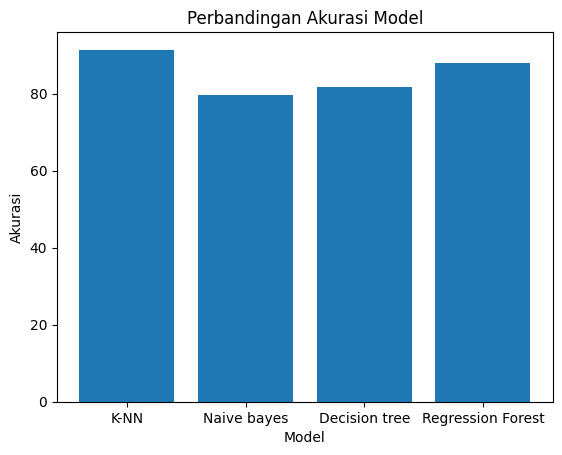

In [459]:
model = ['K-NN', 'Naive bayes', 'Decision tree', 'Regression Forest']
akurasi = [acc_knn, acc_nb, acc_dt, acc_rf]

plt.bar(model, akurasi)
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.show()
